In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the data from the CSV file for processing
cancer_data = pd.read_csv('../datasets/combined_breast_cancer_risk_factors.csv')
# Data is all numeric and 9 for some rows represents unknown or missing valuels
# From the data we will first remove columns that require diagnosis/measurement
# Then we will remove those rows that have unknown values for the target breast_cancer_history
# For other unknowns we will replace them with median values/mode values
# Then We will remove duplicates 
# We will remove the feature year as its only a record of when the data was collected
# We remove biophx and BIRSDS_breast_density as they require measuring
# We remove the column for race and count as they wont be used as factors

cancer_data.drop(columns=['year','race_eth','BIRADS_breast_density','biophx','count'], inplace=True)

In [3]:
# for unknowns in bmi,breast_cancer_history, current_hrt,age_menarche,age_first_birth,
#first_degree_hx and menopaus replace with NaN
cancer_data['breast_cancer_history'].replace(9,np.nan,inplace=True)
cancer_data['bmi_group'].replace(9,np.nan,inplace=True)
cancer_data['menopaus'].replace(9,np.nan,inplace=True)
cancer_data['current_hrt'].replace(9,np.nan,inplace=True)
cancer_data['age_menarche'].replace(9,np.nan,inplace=True)
cancer_data['age_first_birth'].replace(9,np.nan,inplace=True)
cancer_data['first_degree_hx'].replace(9,np.nan,inplace=True)

/tmp/ipykernel_43761/630631913.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cancer_data['breast_cancer_history'].replace(9,np.nan,inplace=True)
/tmp/ipykernel_43761/630631913.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [4]:
# Removing rows that have empty values for the target
cancer_data.dropna(subset="breast_cancer_history", inplace=True)
cancer_data.reset_index(drop=True, inplace=True)


In [5]:
# Replace empty values with the mode 
for column in cancer_data:
    mode_value = cancer_data[column].mode()[0]
    cancer_data.loc[:, column] = cancer_data[column].fillna(mode_value)
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191438 entries, 0 to 1191437
Data columns (total 8 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   age_group_5_years      1191438 non-null  int64  
 1   first_degree_hx        1191438 non-null  float64
 2   age_menarche           1191438 non-null  float64
 3   age_first_birth        1191438 non-null  float64
 4   current_hrt            1191438 non-null  float64
 5   menopaus               1191438 non-null  float64
 6   bmi_group              1191438 non-null  float64
 7   breast_cancer_history  1191438 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 72.7 MB


In [6]:
# We then remove duplicates
#cancer_data.drop_duplicates(inplace = True)
cancer_data.reset_index(drop=True, inplace=True)
cancer_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191438 entries, 0 to 1191437
Data columns (total 8 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   age_group_5_years      1191438 non-null  int64  
 1   first_degree_hx        1191438 non-null  float64
 2   age_menarche           1191438 non-null  float64
 3   age_first_birth        1191438 non-null  float64
 4   current_hrt            1191438 non-null  float64
 5   menopaus               1191438 non-null  float64
 6   bmi_group              1191438 non-null  float64
 7   breast_cancer_history  1191438 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 72.7 MB


In [7]:
# We begin analysing our data, first we use Describe
cancer_data.describe()


,age_group_5_years,first_degree_hx,age_menarche,age_first_birth,current_hrt,menopaus,bmi_group,breast_cancer_history
count,1.191438e+06,1.191438e+06,1.191438e+06,1.191438e+06,1.191438e+06,1.191438e+06,1.191438e+06,1.191438e+06
mean,7.274330e+00,2.858328e-01,9.714354e-01,2.431873e+00,8.742713e-02,1.862757e+00,1.888322e+00,1.861415e-01
std,2.571252e+00,4.518103e-01,5.598323e-01,1.511467e+00,2.824601e-01,5.533378e-01,1.066561e+00,3.892209e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,5.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00
50%,7.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00
75%,9.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
max,1.300000e+01,1.000000e+00,2.000000e+00,4.000000e+00,1.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00


Negatives : 969662
Positives : 221776
sum : 1191438


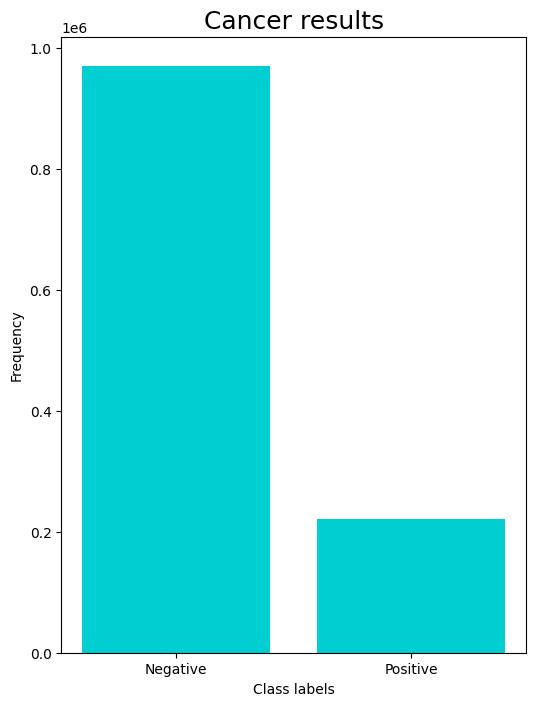

In [8]:
#The standard deviations are small indicating that we have few or no outliers
#considering the min and max values we have no wrong data as all data is in the correct range
# We visualize our data to see the data on positive and negative cancer patients
positive = cancer_data[cancer_data['breast_cancer_history'] == 1]
negative = cancer_data[cancer_data['breast_cancer_history'] == 0]
positive_count = len(positive['breast_cancer_history'])
negative_count = len(negative['breast_cancer_history'])
print("Negatives : {}".format(negative_count))
print("Positives : {}".format(positive_count))
print("sum : {}".format(negative_count + positive_count))
plt.figure(figsize = (6, 8))
plt.title('Cancer results', fontsize = 18)
plt.bar(['Negative', 'Positive'], [negative_count,positive_count], color = 'darkturquoise')
plt.xlabel('Class labels')
plt.ylabel('Frequency')
plt.show()



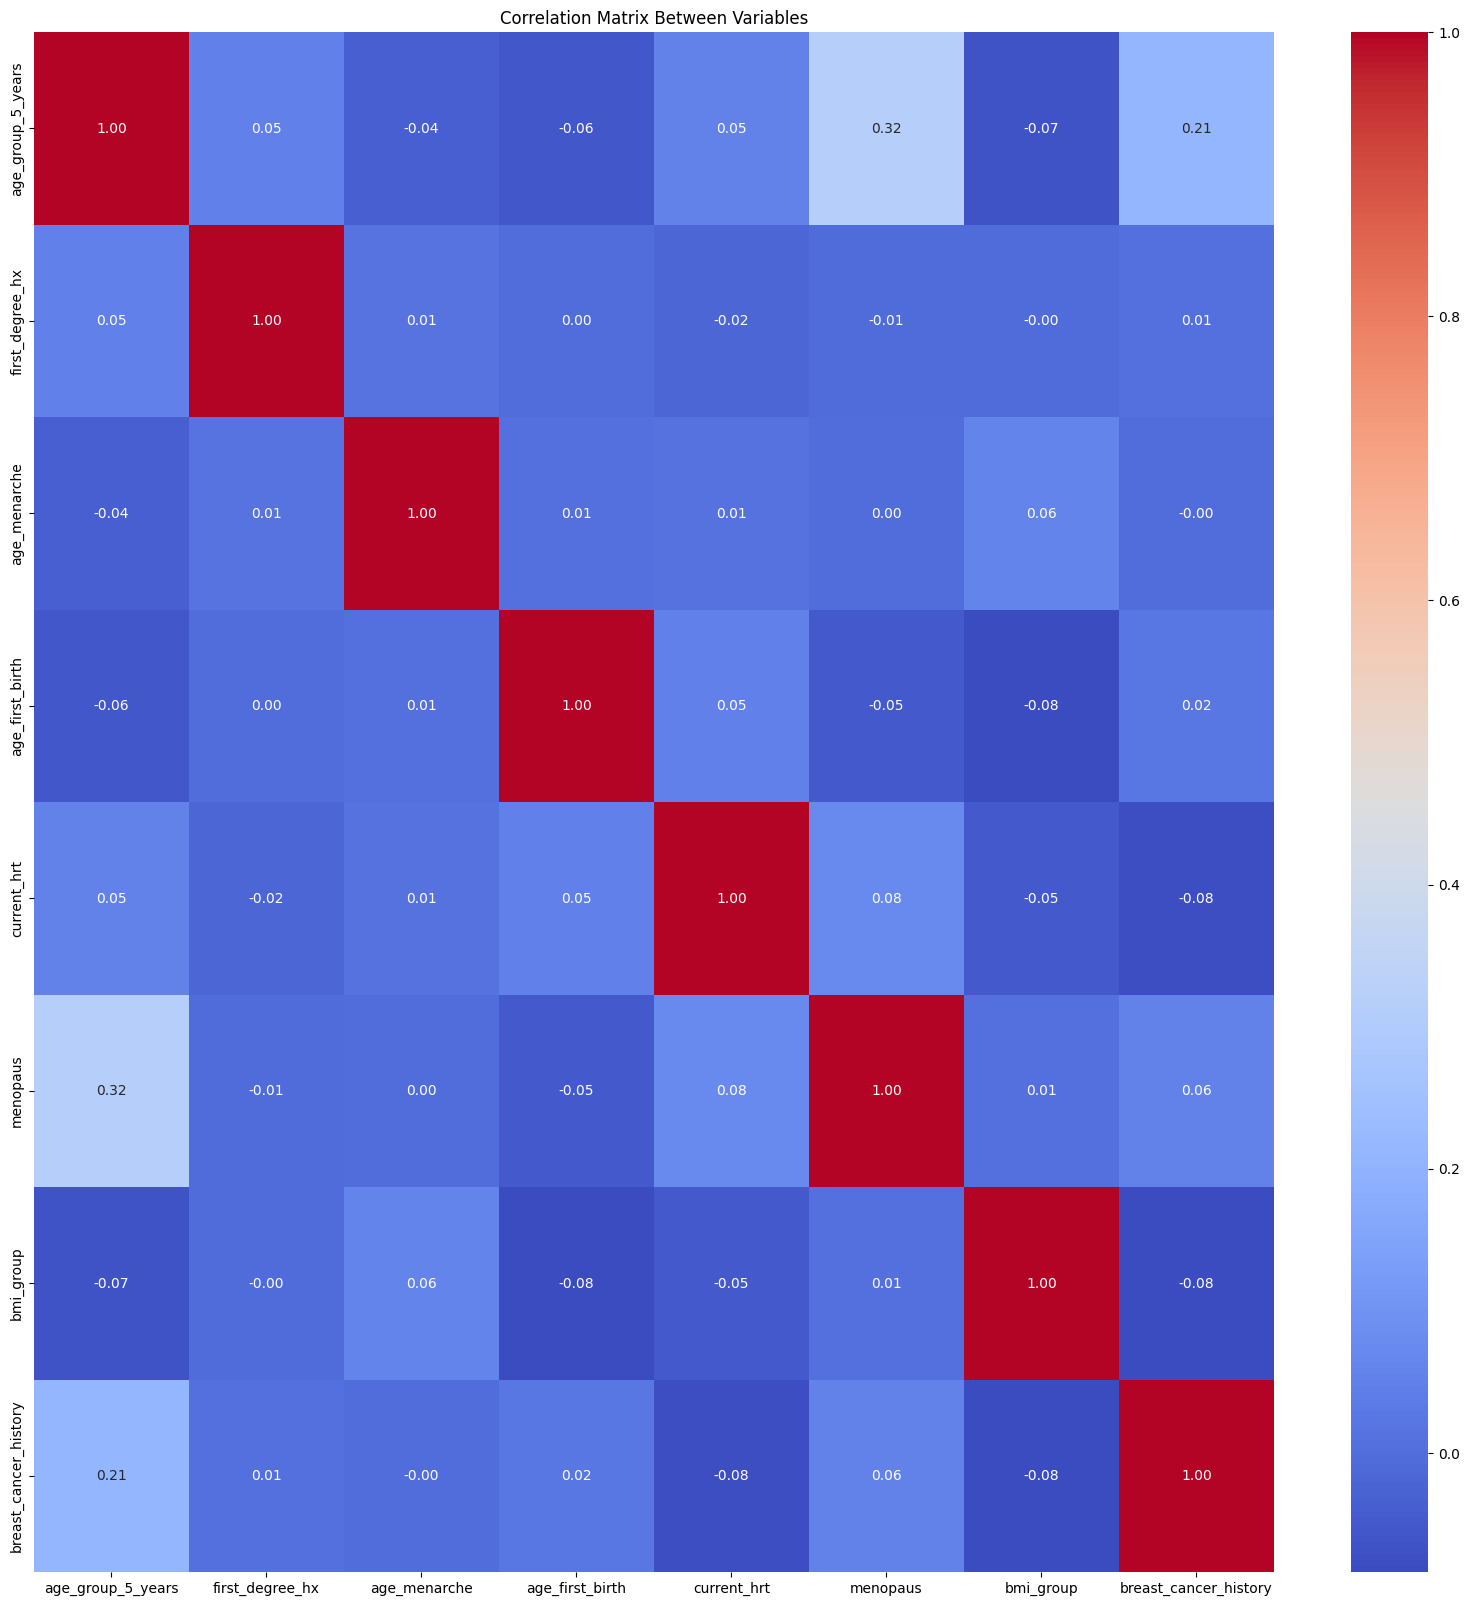

In [9]:

# This data has more negative tests than the positive tests
# In this case, the ratio of negatives to positives is about 1.4:1 (roughly 58% negatives and 42% positives). 
# For many classification algorithms, this level of imbalance is often acceptable and can yield good performance 
# without any special techniques.

# Let us see the relationship between attributes by using a correlation matrix
correlation_matrix = cancer_data.corr()

# We visualize the correlation matrix 
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Between Variables")
plt.show()



In [10]:
# From the correlation matrix we see no good correlation between the features
# This Implies :
#Low Redundancy:
#– Positive Side:
#Low inter-feature correlation means that each feature is likely capturing unique information.
# This is beneficial because it minimizes redundancy in our feature set. Models that are sensitive 
# to multicollinearity (like linear regression) can perform better when predictors are independent.
#– Negative Side (Potential Caution):
# However, if the features also show only a weak relationship with the target variable as is the case here 
# it might mean that no single feature is a strong predictor on its own.
# In such cases, we’ll need our model to capture more complex (e.g., nonlinear or interaction) relationships
# to achieve good performance.

# Modeling Implications:
#– For Linear Models:
#  Low inter-feature correlation is advantageous because it reduces the risk of multicollinearity,
#  which can inflate the variance of coefficient estimates and make model interpretation unstable.

#– For Tree-based Models and Neural Networks:
#  These models can often combine weak predictors in a nonlinear way. 
#  The absence of strong pairwise correlations among features means that each feature can potentially 
#  contribute unique splits (in trees) or parts of the signal (in neural nets) without redundancy. 



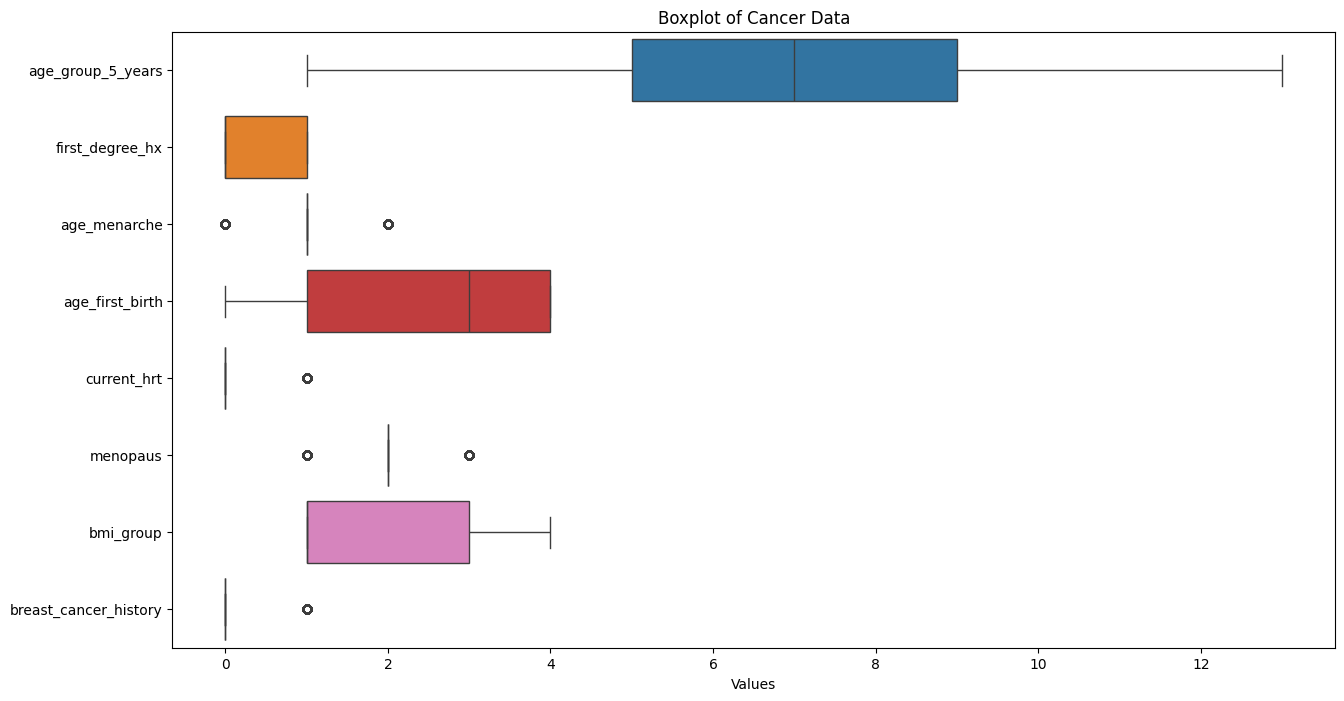

In [11]:
#Let's check for outliers with #box plot
plt.figure(figsize=(15, 8))
sns.boxplot(data=cancer_data, orient="h")
plt.title("Boxplot of Cancer Data")
plt.xlabel("Values")
plt.show()


In [12]:
# We save our cleaned dataset so that it can be used in modeling
cancer_data.to_csv('../datasets/cleaned_breast_cancer_data.csv',index=False)